<center><h3> TOPIC : Case study on VirginAmerica twitter dataset using Naive Bayes for exploratory sentiment analysis</h3></center>



#### Contents:
* Importing libraries and data
* Processing the text into binary vectors
* Seperate the data into test and train
* Fit Multinomial Naive Bayes and check against test data
* Plotting the confusion matrix with Seaborn
* Finding the most important predictors for positive and negative sentiments
* Checking the predictors against the airline results

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt    

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import data

use_cols = ['airline_sentiment', 'text', 'airline']

df = pd.read_csv('Tweets.csv', usecols = use_cols)

df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [3]:
# Lets process the text

stop_words = stopwords.words('english')

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                    if word not in (stop_words)]))

countVect = CountVectorizer(min_df= 10)

binaryVector = countVect.fit_transform(df.text_without_stopwords)

In [4]:
# Seperate dataset into test and train

y = df.airline_sentiment
X = binaryVector

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=123)

print([x.shape for x in [train_X, test_X, train_y, test_y]])

[(10980, 1872), (3660, 1872), (10980,), (3660,)]


In [5]:
# Now for testing the naive bayes model

MNB = MultinomialNB()
MNB.fit(train_X, train_y)

predicted = MNB.predict(test_X)
accuracy_score = metrics.accuracy_score(predicted, test_y)
confusion_count = metrics.confusion_matrix(predicted, test_y)


print('Accuracy: ',accuracy_score,'\n')
print('Confusion Matrix:\n',confusion_count)

Accuracy:  0.7808743169398907 

Confusion Matrix:
 [[2015  304   76]
 [ 186  430   60]
 [ 111   65  413]]


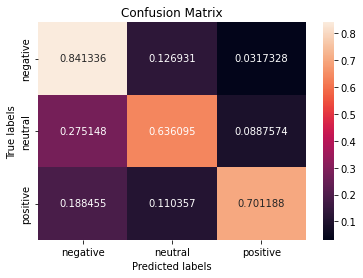

In [6]:
# Lets plot the results properly

confusion = metrics.confusion_matrix(predicted, test_y, normalize = 'true')

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); 
ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

The accuracy looks good as does the confusion matrix. It seems especially strong on positive and negative sentiments but weaker on those that are neutral. 
This is to be expected.

In [7]:
# Lets look for the most important words

neg_class_prob_sorted = MNB.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = MNB.feature_log_prob_[1, :].argsort()[::-1]

print('Negative words:\n', np.take(countVect.get_feature_names(), neg_class_prob_sorted[:25]))
print('\nPositive words:\n', np.take(countVect.get_feature_names(), pos_class_prob_sorted[:25]))

Negative words:
 ['united' 'flight' 'usairways' 'americanair' 'southwestair' 'jetblue'
 'get' 'cancelled' 'service' 'hours' 'hold' 'can' 'customer' 'help' 'time'
 'plane' 'amp' 'delayed' 'still' 'you' 'us' 'co' 'one' 'call' 'http']

Positive words:
 ['jetblue' 'united' 'southwestair' 'flight' 'co' 'http' 'americanair'
 'usairways' 'get' 'please' 'flights' 'virginamerica' 'need' 'thanks'
 'help' 'can' 'dm' 'would' 'know' 'it' 'our' 'fleek' 'fleet' 'us' 'you']


In [8]:
#These words show a number of airline names so lets 
#compare this with the positive / negative associations for each airline.

piv = df.pivot_table(index=['airline'], columns='airline_sentiment', aggfunc='size', fill_value=0)
piv

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


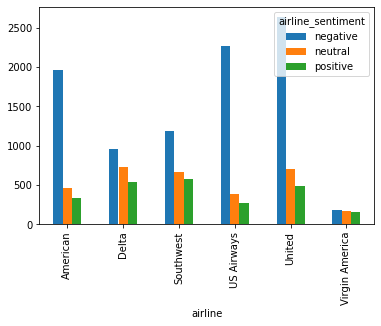

In [9]:
piv.plot(kind='bar')
plt.show()

We would expect from this to see more positive association with Delta, Southwest and Virgin, and more negative assocation with American, US Airways and United.

This can be seen to some extent as Southwest and Virgin hold higher places on the positive list and American, US Airways and United higher on the negative list (when compared to themselves). However the difference in passenger numbers blunts this effect, an example of this is United which holds the most negative sentiments and the third most positive. 